In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from Bio import SeqIO

This program plots the first two amino acids as a pie chart. The first amino acid is displayed as its nat type substrate. This has to be done in the latest output folder of the pipeline

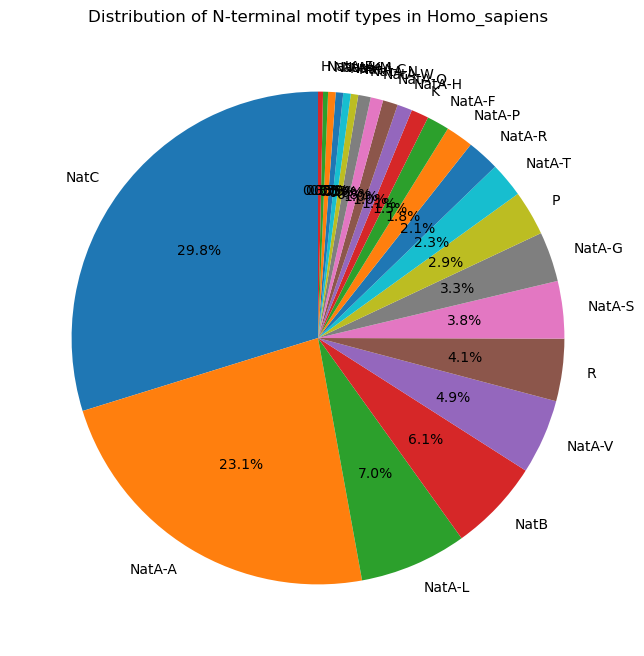

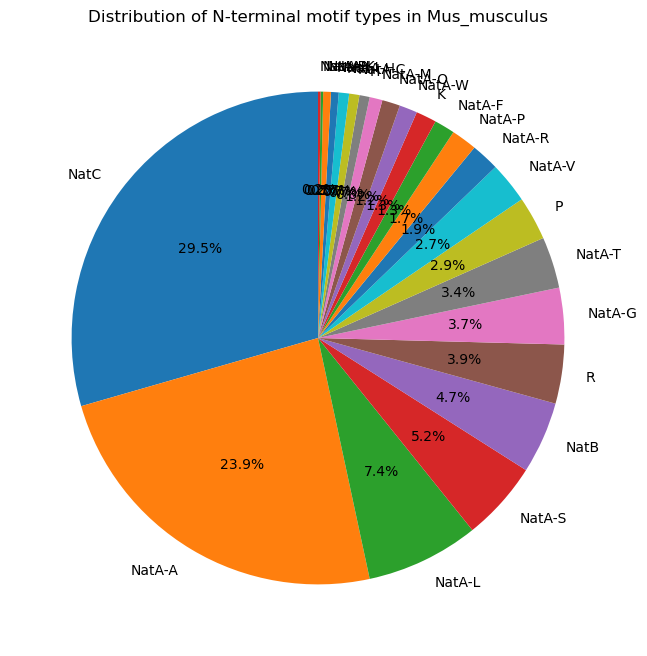

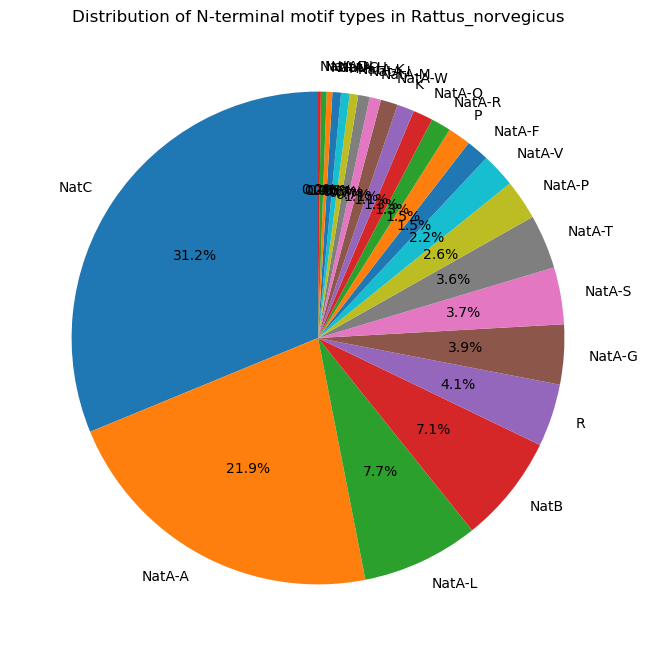

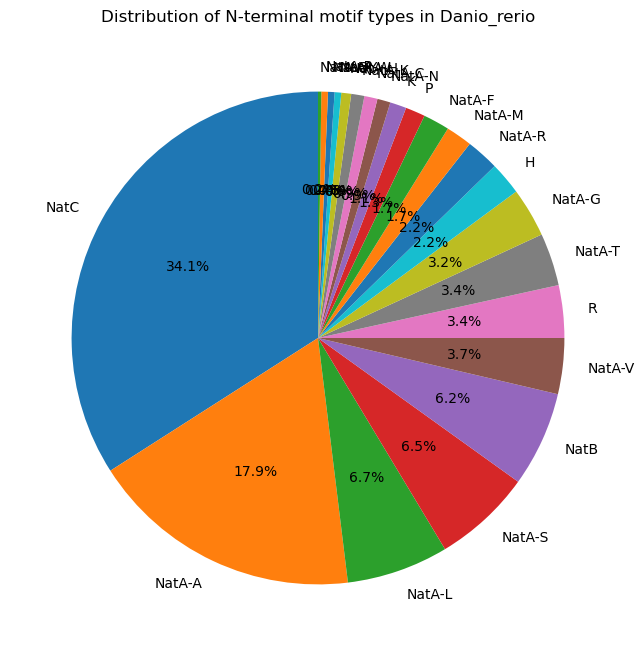

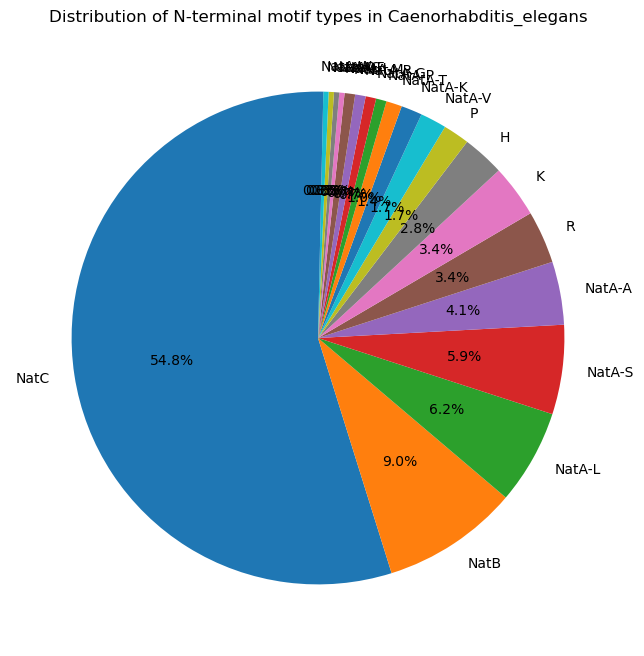

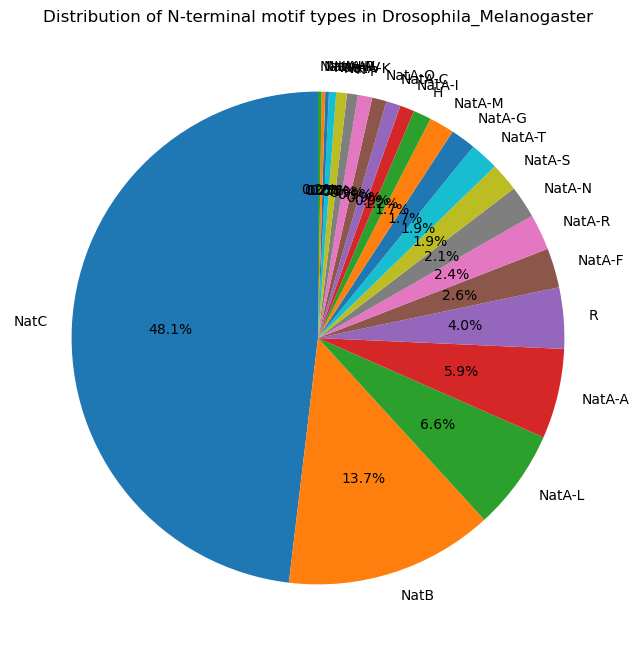

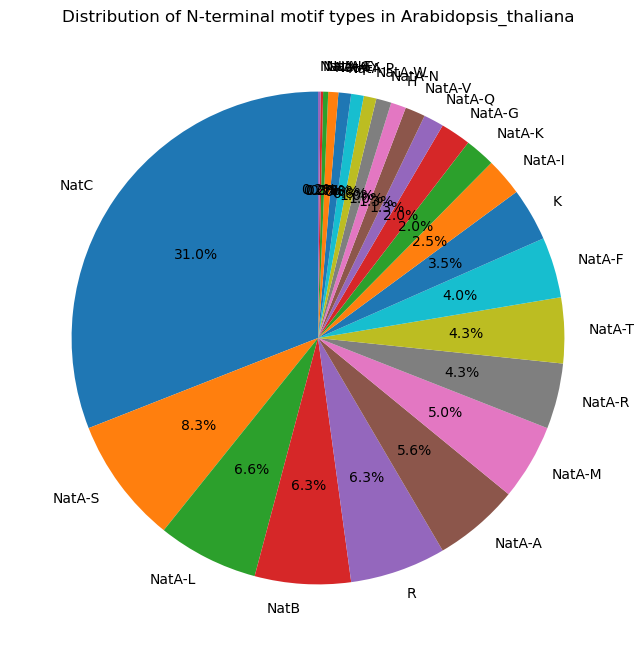

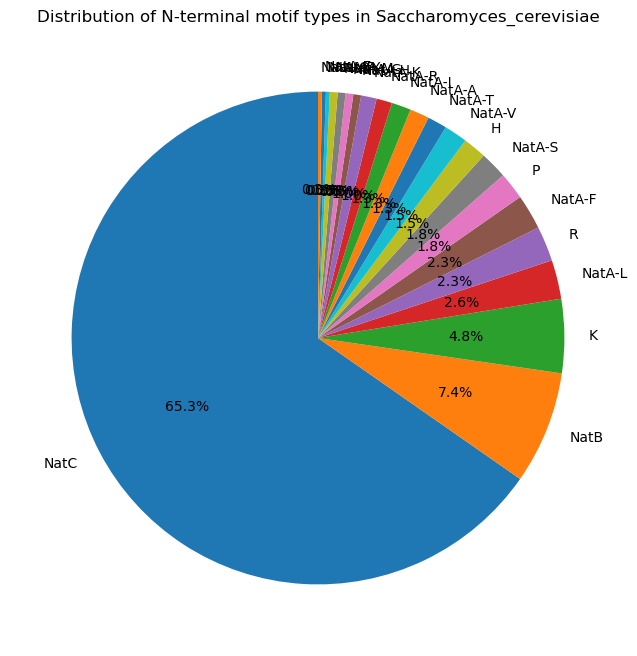

In [21]:
organism_names = [
    "Homo_sapiens","Mus_musculus", "Rattus_norvegicus", "Danio_rerio",
    "Caenorhabditis_elegans", "Drosophila_Melanogaster", "Arabidopsis_thaliana", 
    "Saccharomyces_cerevisiae"]
working_dir = '/home/abalzer/Documents/github_clone/bachelor_thesis/pipeline/output/output_20250617_183904'

for organism in organism_names:
    current_dir =  working_dir + '/' + organism
    #fasta_file = current_dir + '/' + 'filtered_proteins_by_GO_for_' + organism + '.fasta'
    fasta_file = current_dir + '/' + organism + '_filtered_by_GO_cleavable_mts.fasta'
    # Read the FASTA file and extract protein sequences
    records = list(SeqIO.parse(fasta_file, "fasta"))

    # Create a DataFrame with protein IDs as index and sequences as a column
    protein_df = pd.DataFrame({
        'Protein_ID': [record.id for record in records],
        'Sequence': [str(record.seq) for record in records]
    }).set_index('Protein_ID')
    protein_df['Nat_substrate_type'] = protein_df['Sequence'].apply(
        lambda seq: 'NatC' if seq[1] in 'LFIWYM' else ('NatA' + '-' + seq[2] if seq[1] in 'SATCGV' else ('NatB' if seq[1] in 'DENQ' else seq[1]))
    )
    # Count the occurrences of each Nat_substrate_type
    type_counts = protein_df['Nat_substrate_type'].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 8))
    type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of N-terminal motif types in {organism}')
    plt.ylabel('')  # Remove the default ylabel
    plt.show()
